In [1]:
!pip install ultralytics > /dev/null

# ✨🙏 Я очень старался! Если вам понравился ноутбук, пожалуйста, поставьте Upvote! 👍💖

# ✨🙏 I worked really hard! If you liked this notebook, please give it an Upvote! 👍💖

In [2]:
import os
import cv2
import shutil
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from pathlib import Path
from ultralytics import YOLO

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [3]:
train_images = Path('/kaggle/input/synthetic-2-real-object-detection-challenge-2/Synthetic to Real Object Detection Challenge 2/train/images')
train_masks = Path('/kaggle/input/synthetic-2-real-object-detection-challenge-2/Synthetic to Real Object Detection Challenge 2/train/labels')

test_images = Path("/kaggle/input/synthetic-2-real-object-detection-challenge-2/Synthetic to Real Object Detection Challenge 2/testImages/images")

In [4]:
output_dir = Path("/kaggle/working/predictions/labels")
output_dir.mkdir(parents=True, exist_ok=True)

# 🤩 Для начала, давайте посмотрим на изображения!

# 🤩 First, let's look at the images!

In [5]:
def visualize_random_masks(images_dir, masks_dir, counts=5):
    """
    Визуализирует случайные изображения с наложенными масками.
    Vizualize random images with masks.
    
    images_dir: путь к директории с изображениями
    images_dir: path to directory with images
    
    masks_dir: путь к директории с масками
    masks_dir: path to directory with masks
    
    counts: Количество изображений для вывода
    counts: Numbers of images to show
    """

    image_paths = list(images_dir.glob("*"))
    samples = np.random.choice(image_paths, counts, replace=False)

    plt.figure(figsize=(counts * 5, 8))

    for i, img_path in enumerate(samples, 1):
        mask_path = masks_dir / img_path.with_suffix(".txt").name

        image = cv2.imread(str(img_path))
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        h, w, _ = image.shape

        with open(mask_path, "r") as f:
            lines = f.readlines()
    
        for line in lines:
            parts = line.strip().split()

            try:
                class_id, x_center, y_center, box_w, box_h = map(float, parts)
            except:
                class_id, confidence, x_center, y_center, box_w, box_h = map(float, parts)

            x_center *= w
            y_center *= h
            box_w *= w
            box_h *= h
    
            x1 = int(x_center - box_w / 2)
            y1 = int(y_center - box_h / 2)
            x2 = int(x_center + box_w / 2)
            y2 = int(y_center + box_h / 2)

            cv2.rectangle(image, (x1, y1), (x2, y2), (0, 255, 0), 5)

        plt.subplot(1, counts, i)
        plt.imshow(image)
        plt.axis("off")
        plt.tight_layout()

/tmp/ipykernel_19/4015148840.py:54: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


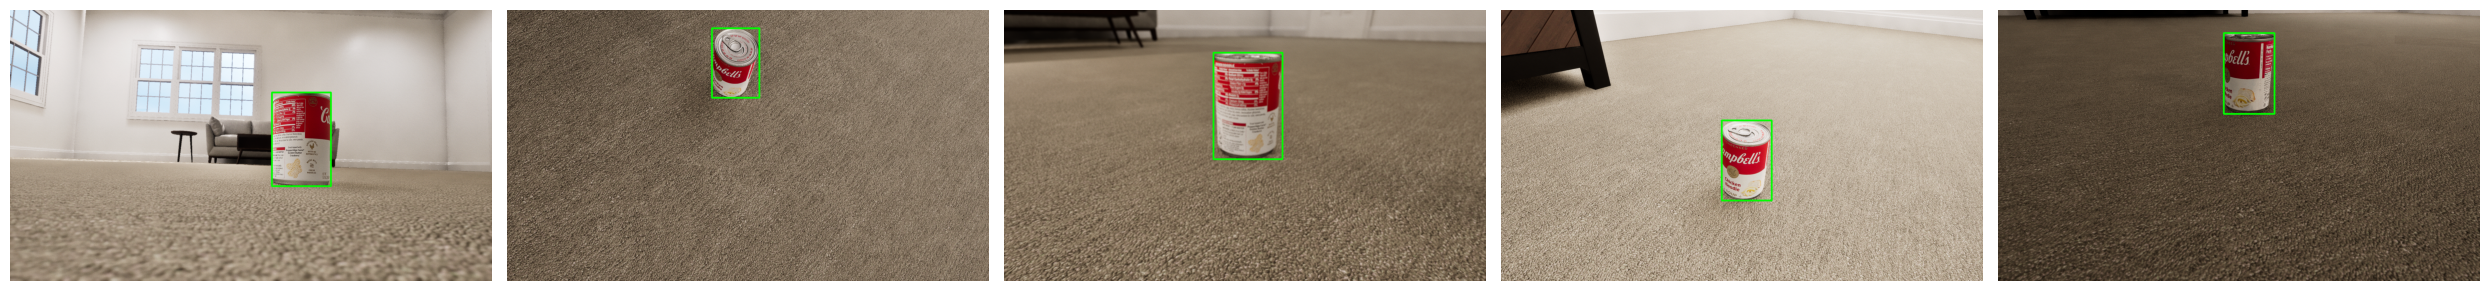

In [6]:
visualize_random_masks(train_images, train_masks)

# 💃 Скомпелируем модель
# 💃 Compile the model

In [7]:
data_yaml = """
path: /kaggle/input/synthetic-2-real-object-detection-challenge-2/Synthetic to Real Object Detection Challenge 2

train: train/images
val: val/images
test: testImages/images

nc: 1
names: ['object']
"""

with open('data.yaml', 'w') as file:
    file.write(data_yaml)

Модели детекции YOLOv11

Detection models YOLOv11

    yolo11n.pt 🚀✨ — Nano
    
    yolo11s.pt 🐦⚡ — Small
    
    yolo11m.pt 🦅🔥 — Medium
    
    yolo11l.pt 🐉💪 — Large
    
    yolo11x.pt 🦾🏋️‍♂️ — Extra Large

Нужно больше информации❓
[YOLOv11](https://docs.ultralytics.com/ru/tasks/detect/#models)

Do you need more information❓
[YOLOv11](https://docs.ultralytics.com/ru/tasks/detect/#models)

In [8]:
model = YOLO("yolo11n.pt") 

results = model.train(
    data="data.yaml",         # путь к данным / data path
    epochs=10,                # эпохи (кол-во проходов) / epochs (training passes)
    batch=8,                  # размер батча / batch size
    imgsz=640,                # размер изображения / image size
    device=[0,1],             # "cpu", 0 - GPU, [0, 1] - 2 GPUs
    patience=20,              # ранняя остановка (если нет улучшений) / early stopping patience
    cos_lr=True,              # косинусный lr / cosine learning rate
    dropout=0.3,              # регуляризация дропаут / dropout regularization
    mosaic=1.0,               # аугментация мозаика / mosaic augmentation
    fliplr=0.4,               # вероятность горизонтального отражения / horizontal flip probability
    flipud=0.4,               # вероятность вертикального отражения / vertical flip probability
    hsv_h=0.015,              # изменение оттенка (Hue) / hue change
    hsv_s=0.7,                # изменение насыщенности (Saturation) / saturation change
    hsv_v=0.4,                # изменение яркости (Value) / value change (brightness)
    translate=0.1,            # сдвиг объекта / translation
    scale=0.5,                # масштабирование / scaling
    shear=0.0,                # наклон / shear
    lr0=0.001,                # начальный lr / initial learning rate
    optimizer="SGD",          # оптимизатор / optimizer
    momentum=0.937,           # моментум для SGD / momentum for SGD
    weight_decay=0.0005,      # регуляризация веса / weight decay (L2 regularization)
)

100%|██████████| 5.35M/5.35M [00:00<00:00, 65.3MB/s]


Ultralytics 8.3.143 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
                                                        CUDA:1 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=8, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=True, cutmix=0.0, data=data.yaml, degrees=0.0, deterministic=True, device=0,1, dfl=1.5, dnn=False, dropout=0.3, dynamic=False, embed=None, epochs=10, erasing=0.4, exist_ok=False, fliplr=0.4, flipud=0.4, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.001, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolo11n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train, nbs=64, nms=False, opset=None, optimize=False, optimizer=SGD, overlap_mask=True, pa

100%|██████████| 755k/755k [00:00<00:00, 17.6MB/s]


Overriding model.yaml nc=80 with nc=1

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      6640  ultralytics.nn.modules.block.C3k2            [32, 64, 1, False, 0.25]      
  3                  -1  1     36992  ultralytics.nn.modules.conv.Conv             [64, 64, 3, 2]                
  4                  -1  1     26080  ultralytics.nn.modules.block.C3k2            [64, 128, 1, False, 0.25]     
  5                  -1  1    147712  ultralytics.nn.modules.conv.Conv             [128, 128, 3, 2]              
  6                  -1  1     87040  ultralytics.nn.modules.block.C3k2            [128, 128, 1, True]           
  7                  -1  1    295424  ultralytics

train: Scanning /kaggle/input/synthetic-2-real-object-detection-challenge-2/Synthetic to Real Object Detection Challenge 2/train/labels... 201 images, 0 backgrounds, 0 corrupt: 100%|██████████| 201/201 [00:02<00:00, 72.97it/s]


WARNING ⚠️ train: Cache directory /kaggle/input/synthetic-2-real-object-detection-challenge-2/Synthetic to Real Object Detection Challenge 2/train is not writeable, cache not saved.
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


train: Scanning /kaggle/input/synthetic-2-real-object-detection-challenge-2/Synthetic to Real Object Detection Challenge 2/train/labels... 172 images, 0 backgrounds, 0 corrupt:  86%|████████▌ | 172/201 [00:00<00:00, 172.36it/s]

val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 106.6±24.5 MB/s, size: 3694.7 KB)


train: Scanning /kaggle/input/synthetic-2-real-object-detection-challenge-2/Synthetic to Real Object Detection Challenge 2/train/labels... 201 images, 0 backgrounds, 0 corrupt: 100%|██████████| 201/201 [00:01<00:00, 194.97it/s]
val: Scanning /kaggle/input/synthetic-2-real-object-detection-challenge-2/Synthetic to Real Object Detection Challenge 2/val/labels... 163 images, 0 backgrounds, 0 corrupt: 100%|██████████| 163/163 [00:02<00:00, 64.76it/s]


WARNING ⚠️ val: Cache directory /kaggle/input/synthetic-2-real-object-detection-challenge-2/Synthetic to Real Object Detection Challenge 2/val is not writeable, cache not saved.
Plotting labels to runs/detect/train/labels.jpg... 
optimizer: SGD(lr=0.001, momentum=0.937) with parameter groups 81 weight(decay=0.0), 88 weight(decay=0.0005), 87 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 4 dataloader workers
Logging results to runs/detect/train
Starting training for 10 epochs...
Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/10     0.658G     0.3617      3.514      0.809          1        640: 100%|██████████| 26/26 [00:09<00:00,  2.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:07<00:00,  2.87it/s]


                   all        163        163    0.00333          1     0.0518     0.0321

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/10      0.67G     0.3221      3.259     0.7869          1        640: 100%|██████████| 26/26 [00:07<00:00,  3.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:05<00:00,  3.66it/s]


                   all        163        163    0.00331      0.994      0.511       0.41


       3/10      0.68G     0.4462       3.15     0.8166          4        640:   0%|          | 0/26 [00:00<?, ?it/s]


      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/10      0.68G     0.3559       2.87     0.8007          1        640: 100%|██████████| 26/26 [00:07<00:00,  3.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:06<00:00,  3.43it/s]


                   all        163        163    0.00333          1      0.889      0.821

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/10     0.689G     0.3316      2.339     0.8099          1        640: 100%|██████████| 26/26 [00:07<00:00,  3.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:05<00:00,  3.78it/s]


                   all        163        163      0.985      0.807      0.962      0.913

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/10     0.699G     0.3303      1.831     0.7783          1        640: 100%|██████████| 26/26 [00:07<00:00,  3.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:05<00:00,  3.79it/s]


                   all        163        163      0.993      0.918      0.982      0.936

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/10     0.709G     0.2979      1.396     0.7596          1        640: 100%|██████████| 26/26 [00:07<00:00,  3.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:05<00:00,  3.65it/s]


                   all        163        163      0.978      0.957      0.984      0.939

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/10     0.719G     0.3156      1.301     0.7971          1        640: 100%|██████████| 26/26 [00:07<00:00,  3.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:05<00:00,  3.75it/s]


                   all        163        163       0.97      0.988      0.993      0.964

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/10     0.729G     0.2962      1.242      0.785          1        640: 100%|██████████| 26/26 [00:08<00:00,  3.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:05<00:00,  3.65it/s]


                   all        163        163       0.97      0.993      0.994      0.966

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/10     0.738G     0.2874      1.196     0.7873          1        640: 100%|██████████| 26/26 [00:07<00:00,  3.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:05<00:00,  3.86it/s]


                   all        163        163      0.981      0.994      0.994      0.968

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/10     0.748G     0.2925      1.211     0.7773          1        640: 100%|██████████| 26/26 [00:07<00:00,  3.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:05<00:00,  3.74it/s]


                   all        163        163       0.98      0.994      0.994      0.968

10 epochs completed in 0.039 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 5.4MB
Optimizer stripped from runs/detect/train/weights/best.pt, 5.4MB

Validating runs/detect/train/weights/best.pt...
Ultralytics 8.3.143 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
                                                        CUDA:1 (Tesla T4, 15095MiB)
YOLO11n summary (fused): 100 layers, 2,582,347 parameters, 0 gradients, 6.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:05<00:00,  3.79it/s]


                   all        163        163      0.981      0.994      0.994      0.968


/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1
/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


Speed: 0.1ms preprocess, 2.5ms inference, 0.0ms loss, 1.6ms postprocess per image
Results saved to runs/detect/train


# 🎇 Предсказываем тестовый датасет и сохраняем в txt
# 🎇 We predict the test dataset and save it in txt

In [9]:
for img_path in test_images.glob("*"):
    results = model.predict(img_path, conf=0.1, device=0, verbose=False) # 0 - GPU or "cpu"
    output_txt = output_dir / f"{img_path.stem}.txt"

    with open(output_txt, "w") as f:
        found = False
        for result in results:
            img_height, img_width = result.orig_shape
            boxes = result.boxes.data

            if boxes is None or len(boxes) == 0:
                continue

            filtered_boxes = boxes[boxes[:, 4] >= 0.05]
            if len(filtered_boxes) == 0:
                continue

            found = True
            for box in filtered_boxes:
                x1, y1, x2, y2, confidence, cls_id = box.tolist()

                x_center = ((x1 + x2) / 2) / img_width
                y_center = ((y1 + y2) / 2) / img_height
                width = (x2 - x1) / img_width
                height = (y2 - y1) / img_height

                f.write(f"0 {confidence:.6f} {x_center:.6f} {y_center:.6f} {width:.6f} {height:.6f}\n")

        if not found:
            f.write("")

# 😎 Посмотрим что получилось
# 😎 Let's see the results

/tmp/ipykernel_19/4015148840.py:54: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


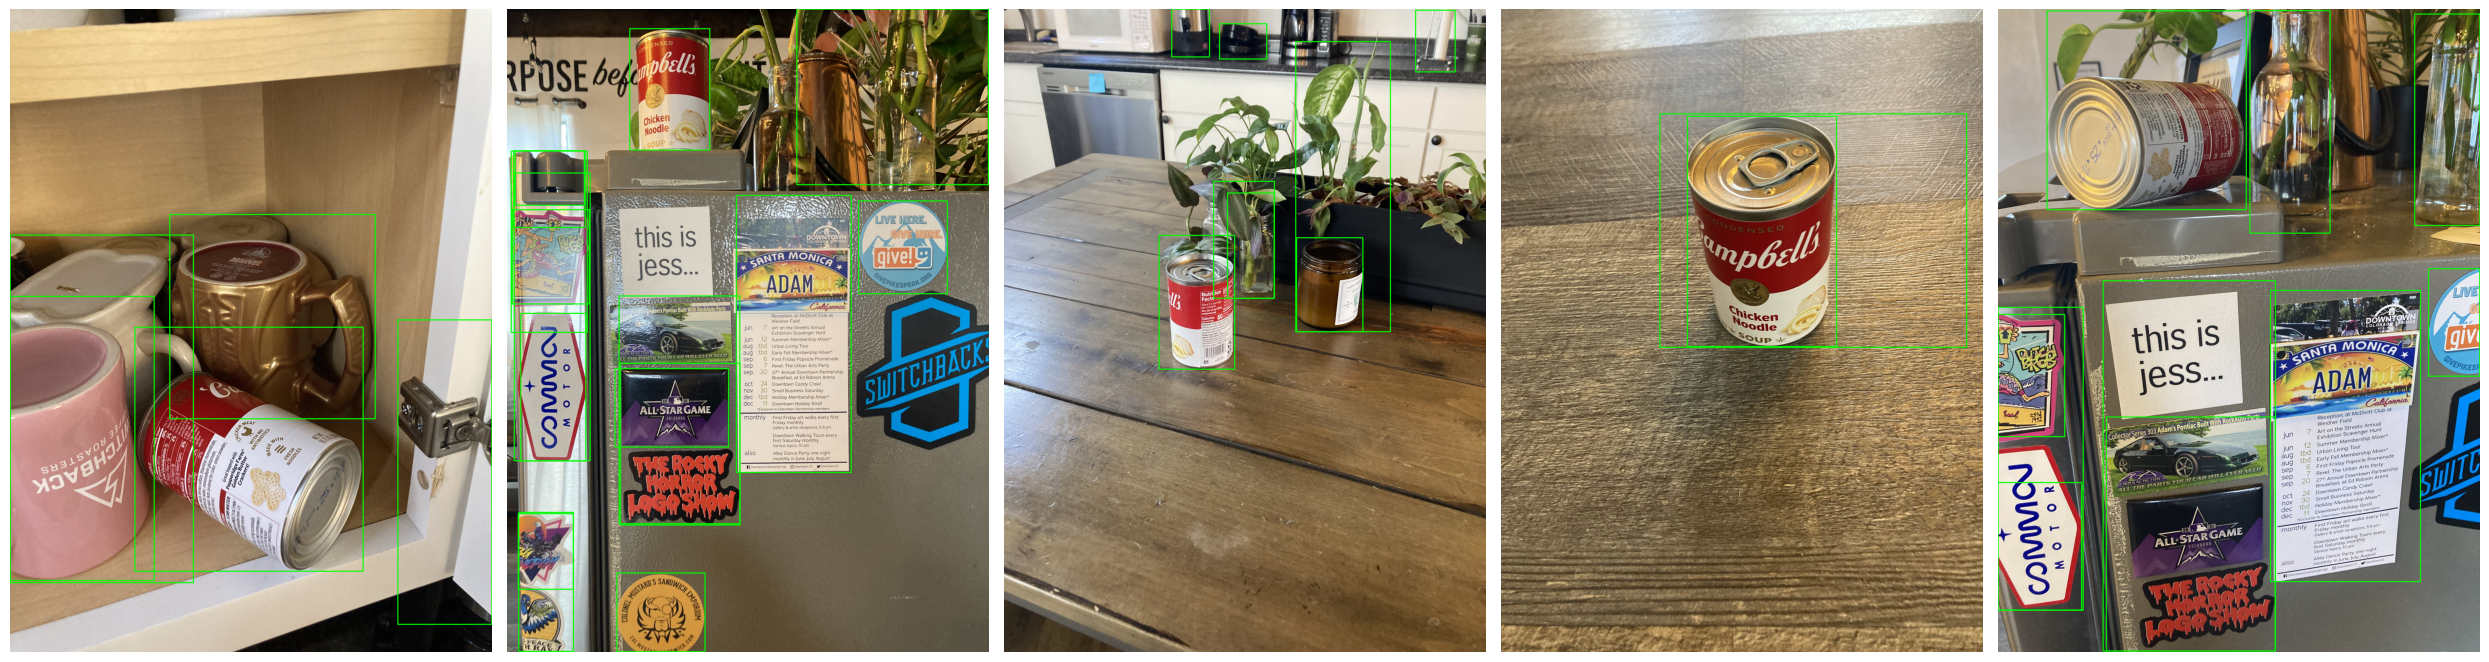

In [10]:
visualize_random_masks(test_images, output_dir)

# ✉️ Сохранение результатов
# ✉️ Saving the results

In [11]:
rows = []
test_imgs = {p.stem for p in test_images.glob("*") if p.suffix.lower() in {".jpg", ".jpeg", ".png"}}
predicted = set()

for file in output_dir.glob("*.txt"):
    name = file.stem
    predicted.add(name)

    try:
        lines = [l.strip() for l in open(file) if len(l.strip().split()) == 6]
    except:
        lines = []

    rows.append({"image_id": name, "prediction_string": " ".join(lines) if lines else "no boxes"})

for name in test_imgs - predicted:
    rows.append({"image_id": name, "prediction_string": "no boxes"})

Удаляем лишнее

Removing the excess

In [12]:
work_dir = '/kaggle/working'

for filename in os.listdir(work_dir):
    file_path = os.path.join(work_dir, filename)

    try:
        if os.path.isfile(file_path) or os.path.islink(file_path):
            os.unlink(file_path)
        elif os.path.isdir(file_path):
            shutil.rmtree(file_path)
    except Exception as e:
        print(f'Error file: {file_path}. Cause: {e}')

In [13]:
rows = pd.DataFrame(rows)
rows.to_csv("submission.csv", index=False)